# Used Kaggle Data Set for Image Classification Problem


In [ ]:
!pip install --upgrade fastai fastcore timm kaggle pynvml nbdev -qq

     |████████████████████████████████| 549 kB 4.7 MB/s 
     |████████████████████████████████| 46 kB 5.4 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 182 kB 10.5 MB/s 
     |████████████████████████████████| 58 kB 3.6 MB/s 
     |████████████████████████████████| 78 kB 3.1 MB/s 
     |████████████████████████████████| 1.6 MB 32.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
base_folder = Path('/content/drive/MyDrive/data')

In [ ]:
data_folder = base_folder/'datasets'/'HW_8'
model_folder = base_folder/'models/dl_fall_2022'/'HW_8'
archive_folder = base_folder/'archive'
kaggle_api = base_folder/'.kaggle'

In [ ]:
data_folder.mkdir(exist_ok=True, parents=True)
model_folder.mkdir(exist_ok=True, parents=True)
kaggle_api.mkdir(exist_ok=True, parents=True)
archive_folder.mkdir(exist_ok=True, parents=True)

In [ ]:
kaggle_api

PosixPath('/content/drive/MyDrive/data/.kaggle')

In [ ]:
!ls -la /content/drive/MyDrive/data/.kaggle

total 1
-rw------- 1 root root 73 Nov 28 23:55 kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/MyDrive/data/.kaggle/'

In [ ]:
! chmod 600 /content/drive/MyDrive/data/.kaggle/kaggle.json

In [ ]:
!ls -la /content/drive/MyDrive/data/.kaggle

total 1
-rw------- 1 root root 73 Nov 28 23:55 kaggle.json


In [ ]:
from fastai.vision.all import *
from kaggle import api
from fastcore.parallel import *
import timm


In [ ]:
#!kaggle competitions download -c inclassdlfall22 -p {archive_folder}

In [ ]:
#!ls -la /content/drive/MyDrive/data/archive

In [ ]:
#data_file = archive_folder/'inclassdlfall22.zip' 

In [ ]:
#!unzip -q {data_file} -d {data_folder}

In [ ]:
Path.BASE_PATH = data_folder

In [ ]:
data_folder.ls()

(#3) [Path('sample_submission.csv'),Path('test'),Path('train')]

In [ ]:
(data_folder/'train').ls()

(#1) [Path('train/train')]

In [ ]:
(data_folder/'train/train').ls()

(#10) [Path('train/train/0'),Path('train/train/1'),Path('train/train/2'),Path('train/train/3'),Path('train/train/4'),Path('train/train/5'),Path('train/train/6'),Path('train/train/7'),Path('train/train/8'),Path('train/train/9')]

In [ ]:
train_path = data_folder/'train'
test_path = data_folder/'test'

In [ ]:
train_files = get_image_files(train_path)
test_files = get_image_files(test_path)


In [ ]:
train_files

(#9025) [Path('train/train/0/115.JPEG'),Path('train/train/0/1093.JPEG'),Path('train/train/0/1338.JPEG'),Path('train/train/0/1370.JPEG'),Path('train/train/0/1583.JPEG'),Path('train/train/0/1159.JPEG'),Path('train/train/0/138.JPEG'),Path('train/train/0/1423.JPEG'),Path('train/train/0/1216.JPEG'),Path('train/train/0/1011.JPEG')...]

In [ ]:
test_files

(#3929) [Path('test/test/3321.JPEG'),Path('test/test/3397.JPEG'),Path('test/test/3256.JPEG'),Path('test/test/3072.JPEG'),Path('test/test/326.JPEG'),Path('test/test/345.JPEG'),Path('test/test/3309.JPEG'),Path('test/test/2814.JPEG'),Path('test/test/3508.JPEG'),Path('test/test/3128.JPEG')...]

In [ ]:
train_labels = [parent_label(file) for file in train_files]

In [ ]:
pd.Series(train_labels).value_counts()

7    949
9    949
6    943
8    942
0    941
5    940
3    932
1    928
2    921
4    580
dtype: int64

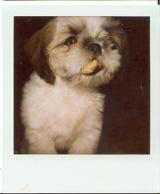

In [ ]:
img = PILImage.create(train_files[0])
img.to_thumb(h = 300)

In [ ]:
img.size

(160, 194)

In [ ]:
def get_img_size(file):
  return PILImage.create(file).size

In [ ]:
from fastcore.parallel import *

In [ ]:
train_sizes = parallel(get_img_size, train_files)

In [ ]:
train_sizes 

(#9025) [(160, 194),(200, 160),(160, 199),(160, 213),(213, 160),(213, 160),(213, 160),(226, 160),(213, 160),(160, 213)...]

In [ ]:
df_train_sizes = pd.Series(train_sizes)

In [ ]:
df_train_sizes.value_counts()

(213, 160)    3125
(240, 160)    1092
(160, 213)     532
(160, 240)     278
(160, 160)     269
              ... 
(293, 160)       1
(160, 265)       1
(300, 160)       1
(297, 160)       1
(320, 160)       1
Length: 283, dtype: int64

In [ ]:
#df_kaggle_train = pd.read_csv(data_folder/'train.csv')
#df_kaggle_train.head()

In [ ]:
dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42),
                   item_tfms = Resize(size = (640, 480), method = 'squish'),
                   batch_tfms = aug_transforms(size = (320, 240), min_scale = 1)
                   )

In [ ]:
doc(RandomSplitter)

In [ ]:
doc(DataBlock)

In [ ]:
DataBlock?

In [ ]:
doc(Resize)

In [ ]:
doc(aug_transforms)

In [ ]:
dblock.summary(data_folder/'train')

Setting-up type transforms pipelines
Found 9025 items
2 datasets of sizes 7220,1805
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/drive/MyDrive/data/datasets/HW_8/train/train/1/5128.JPEG
    applying PILBase.create gives
      PILImage mode=RGB size=160x163
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/drive/MyDrive/data/datasets/HW_8/train/train/1/5128.JPEG
    applying parent_label gives
      1
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=160x163, TensorCategory(1))


Found 9025 items
2 datasets of sizes 7220,1805
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


In [ ]:
dls = dblock.dataloaders(data_folder/'train')

In [ ]:
dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

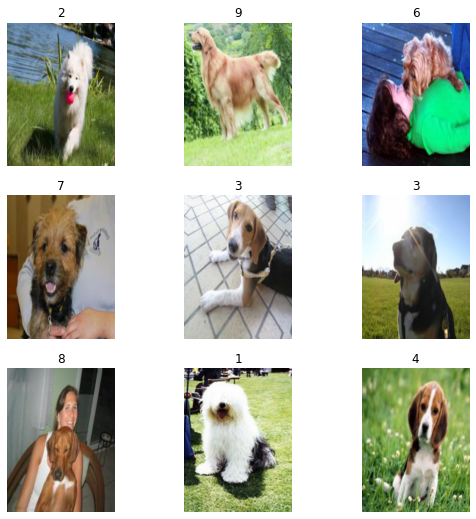

In [ ]:
dls.train.show_batch()

In [ ]:
def get_dataloaders(itfms, btfms):
  dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42),
                   item_tfms = itfms,
                   batch_tfms = btfms
                   )
  set_seed(42)
  dls = dblock.dataloaders(train_files[0, 1000, 5000], bs = 3)
  dls.train.show_batch(max_n = 3)


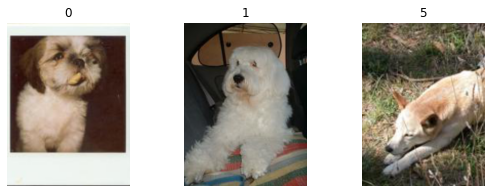

In [ ]:
itfms = Resize((640, 480))
btfms = None
get_dataloaders(itfms, btfms)

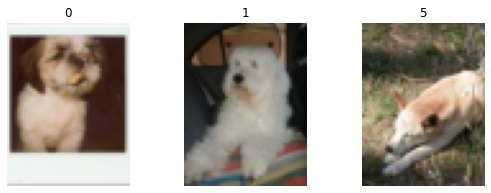

In [ ]:
itfms = Resize((64, 48))
btfms = None
get_dataloaders(itfms, btfms)

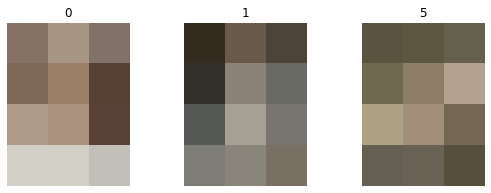

In [ ]:
itfms = Resize((4, 3))
btfms = None
get_dataloaders(itfms, btfms)

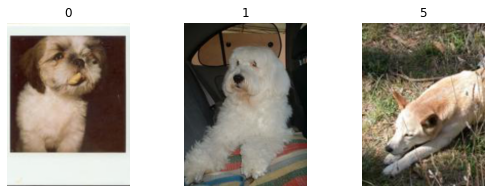

In [ ]:
itfms = Resize((800, 600))
btfms = None
get_dataloaders(itfms, btfms)

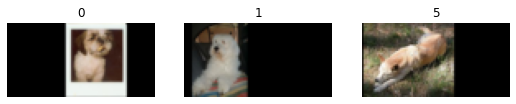

In [ ]:
itfms = Resize((45, 90), method = 'pad', pad_mode = 'zeros')
btfms = None
get_dataloaders(itfms, btfms)

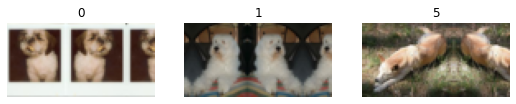

In [ ]:
itfms = Resize((45, 90), method = 'pad', pad_mode = 'reflection')
btfms = None
get_dataloaders(itfms, btfms)

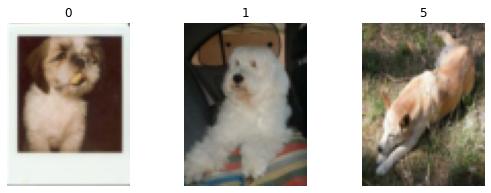

In [ ]:
itfms = Resize((80, 60), method = 'squish')
btfms = None
get_dataloaders(itfms, btfms)

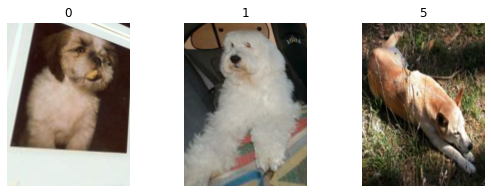

In [ ]:
itfms = Resize((640,480), method = 'squish')
btfms = aug_transforms(size = (320, 240))
get_dataloaders(itfms, btfms)

In [ ]:
dls.device

device(type='cuda', index=0)

In [ ]:
dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(seed = 42),
                   item_tfms = Resize(size = (480), method = 'squish'),
                   batch_tfms = aug_transforms(size = (128), min_scale = 1)
                   )

In [ ]:
dls = dblock.dataloaders(data_folder/'train', bs = 64)

In [ ]:
learn = vision_learner(dls, 'resnet26d', metrics = error_rate, path = model_folder).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26d-69e92c46.pth" to /root/.cache/torch/hub/checkpoints/resnet26d-69e92c46.pth


In [ ]:
learn.fine_tune(3, 0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.490607,0.758903,0.191690,01:21


epoch,train_loss,valid_loss,error_rate,time
0,0.422835,0.553922,0.163435,01:07
1,0.331210,0.527521,0.149030,01:07
2,0.227924,0.476547,0.136288,01:11


In [ ]:
sample_submission = pd.read_csv(data_folder/'sample_submission.csv')

In [ ]:
sample_submission

,file_names,target
0,0.JPEG,7
1,1.JPEG,2
2,2.JPEG,0
3,3.JPEG,5
4,4.JPEG,3
...,...,...
3924,3924.JPEG,7
3925,3925.JPEG,7
3926,3926.JPEG,8
3927,3927.JPEG,3


In [ ]:
test_files = get_image_files(data_folder/'test').sorted()

In [ ]:
test_dl = learn.dls.test_dl(test_files)

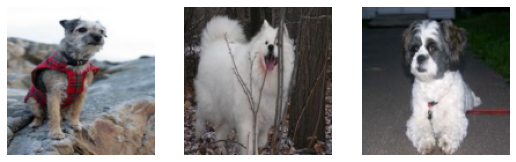

In [ ]:
test_dl.show_batch(max_n = 3)

In [ ]:
preds, _ = learn.tta(dl = test_dl)

In [ ]:
preds.shape

torch.Size([3929, 10])

In [ ]:
idxs = preds.argmax(dim = 1)

In [ ]:
idxs

TensorBase([7, 2, 0,  ..., 8, 3, 6])

In [ ]:
vocab = np.array(learn.dls.vocab)
vocab

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [ ]:
results = pd.Series(vocab[idxs], name = 'idxs')

In [ ]:
results


0       7
1       2
2       0
3       5
4       3
       ..
3924    7
3925    7
3926    8
3927    3
3928    6
Name: idxs, Length: 3929, dtype: object

In [ ]:
sample_submission['target'] = 0

In [ ]:
sample_submission 

,file_names,target
0,0.JPEG,0
1,1.JPEG,0
2,2.JPEG,0
3,3.JPEG,0
4,4.JPEG,0
...,...,...
3924,3924.JPEG,0
3925,3925.JPEG,0
3926,3926.JPEG,0
3927,3927.JPEG,0


In [ ]:
results = pd.Series(vocab[idxs], name = 'idx')

In [ ]:
results

0       7
1       2
2       0
3       5
4       3
       ..
3924    7
3925    7
3926    8
3927    3
3928    6
Name: idx, Length: 3929, dtype: object

In [ ]:
sample_submission['target'] = results

In [ ]:
sample_submission

,file_names,target
0,0.JPEG,7
1,1.JPEG,2
2,2.JPEG,0
3,3.JPEG,5
4,4.JPEG,3
...,...,...
3924,3924.JPEG,7
3925,3925.JPEG,7
3926,3926.JPEG,8
3927,3927.JPEG,3


In [ ]:
sample_submission.to_csv(model_folder/'inclass_11_28.csv', index = False) 

In [ ]:
! head{model_folder/'inclass_11_28.csv'}

/bin/bash: head/content/drive/MyDrive/data/models/dl_fall_2022/HW_8/inclass_11_28.csv: No such file or directory


In [ ]:
pd.read_csv(model_folder/'inclass_11_28.csv').head()

,file_names,target
0,0.JPEG,7
1,1.JPEG,2
2,2.JPEG,0
3,3.JPEG,5
4,4.JPEG,3


In [ ]:
comp = 'inclassdlfall22'

In [ ]:
from kaggle import api

In [ ]:
api.competition_submit(model_folder/'inclass_11_28.csv', 'inclass', comp)

100%|██████████| 45.0k/45.0k [00:01<00:00, 24.5kB/s]


Successfully submitted to Inclass_DL_Fall_22